In [103]:
import sqlite3
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd

In [104]:
module_3db_filename = 'dinofunworld.db'
connection = sqlite3.connect(module_3db_filename)
cursor = connection.cursor()


def execute_query(query: str) -> str:
    return cursor.execute(query).fetchall()

A SQL query was used to retrieve all the sequences that contain information about visiting the attraction.
Next, was created an attraction_data array. Array length corresponds with a number of 5 minutes intervals.
After that, we iterated over all the user data and identified the number of visits to the attraction in a specific five-minute period. This data is used to build all the graphs below.

In [105]:
attraction_id_query = """
SELECT AttractionID
FROM Attraction
WHERE Attraction.name='Atmosfear'
"""
attraction_id = execute_query(attraction_id_query)[0]
attraction_id = str(attraction_id[0])

sequences_data_query = f"""
SELECT Sequences.sequence
FROM Sequences
WHERE Sequences.sequence LIKE '%{attraction_id}%'
"""
sequences_data = execute_query(sequences_data_query)

attraction_data = [0] * len(sequences_data[0][0].split("-"))

for sequence in sequences_data:
    rides = sequence[0].split("-")
    attraction_data = [attraction_data[i] + 1 if int(ride) == int(attraction_id) else attraction_data[i] for i, ride in
                       enumerate(rides)]


A control chart of the total attendance  at the 'Atmosfear' attraction. It displays the attendance, the mean, and the standard deviation bands at one and two standard deviations

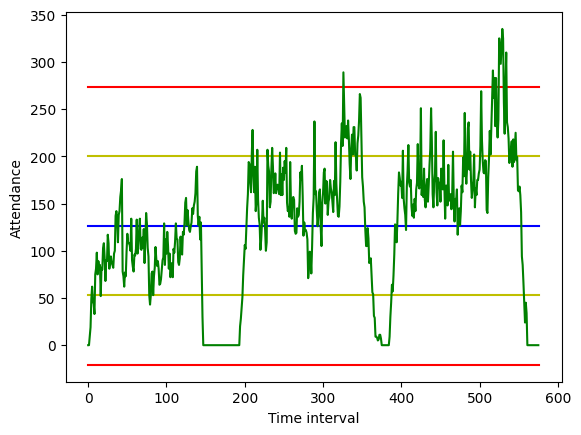

In [106]:
average = np.nanmean(attraction_data)
standard_deviation = np.nanstd(attraction_data)

# average attendance is represented with blue color
plt.plot([0, len(attraction_data)], [average, average], 'b-')
# one standard deviation from the mean in both directions are represented with yellow color
plt.plot([0, len(attraction_data)], [average + standard_deviation, average + standard_deviation], 'y-')
plt.plot([0, len(attraction_data)], [average - standard_deviation, average - standard_deviation], 'y-')
# two standard deviation from the mean in both directions are represented with red color
plt.plot([0, len(attraction_data)], [average + 2 * standard_deviation, average + 2 * standard_deviation], 'r-')
plt.plot([0, len(attraction_data)], [average - 2 * standard_deviation, average - 2 * standard_deviation], 'r-')
# green color shows the attendance of the ride at each point of time (5 min periods)
plt.plot(range(len(attraction_data)), attraction_data, 'g-')
plt.ylabel('Attendance')
plt.xlabel('Time interval')
plt.show()

The window size of the Average chart resized to 50 samples

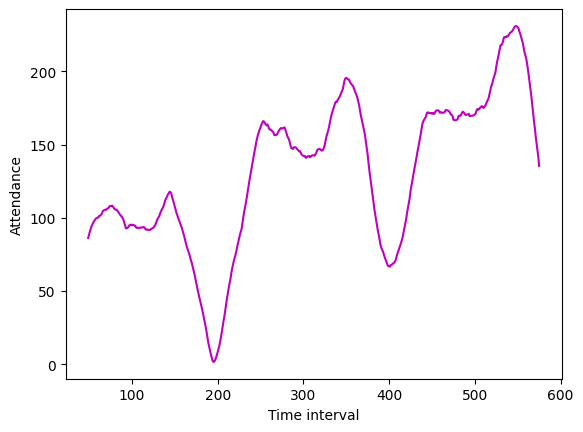

In [107]:
attraction_data = pd.Series(attraction_data)
moving_average = attraction_data.rolling(window=50).mean()

average = np.mean(attraction_data)
standard_deviation = np.std(attraction_data)

plt.plot(range(len(moving_average)), moving_average, 'm-')
plt.ylabel('Attendance')
plt.xlabel('Time interval')
plt.show()

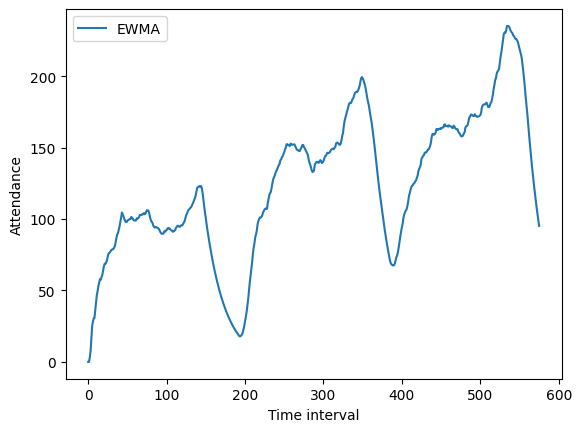

In [108]:
attendance_df = pd.DataFrame({'attendance': attraction_data})
ewma = attendance_df.ewm(span=50).mean()

plt.plot(ewma.index, ewma['attendance'], label='EWMA')
plt.legend()
plt.ylabel('Attendance')
plt.xlabel('Time interval')
plt.show()